# 1.Introducción

En este taller trabajaremos con el Wine Dataset del repositorio de UCI, disponible en sklearn.

El objetivo es predecir la clase de vino a partir de variables químicas como la cantidad de alcohol, ácido málico, flavonoides, entre otros.

Preguntas:

¿Qué diferencia hay entre un problema de regresión y uno de clasificación?
RTA: La principal diferencia es que el de regresion predice un valor o cuanto y el de clasificacion predice un grupo o clasificacion.

¿Por qué un árbol de decisión es adecuado para clasificación?
RTA: si ya que permite pasar por algunos filtros o ramas que el final clasifican por grupos seegun algunas caracteristicas.

# 2. Carga y exploración de datos

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar el dataset
wine = load_wine()

# Convertir a DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

# Mostrar las primeras 15 filas del dataset
print("Primeras 15 filas del dataset:")
print(df.head(15))
print("\n" + "="*50 + "\n")

# Muestra información general del dataset
print("Información del dataset:")
print(df.info())
print("\n" + "="*50 + "\n")

# Genera una tabla con la descripción de cada campo y su significado
print("Descripción de variables:")
for i, feature in enumerate(wine.feature_names):
    print(f"{i+1:2d}. {feature}")
print("\n" + "="*50 + "\n")

# Revisar balance de acuerdo al numero de clases
print("Distribución de clases:")
print(df["target"].value_counts().sort_index())
print("\nBalance de clases:")
print(df["target"].value_counts(normalize=True).sort_index())
print("\n" + "="*50 + "\n")

# Estadísticas descriptivas de variables
print("Estadísticas descriptivas:")
print(df.describe())

Primeras 15 filas del dataset:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
1     13.20        1.78  2.14               11.2      100.0           2.65   
2     13.16        2.36  2.67               18.6      101.0           2.80   
3     14.37        1.95  2.50               16.8      113.0           3.85   
4     13.24        2.59  2.87               21.0      118.0           2.80   
5     14.20        1.76  2.45               15.2      112.0           3.27   
6     14.39        1.87  2.45               14.6       96.0           2.50   
7     14.06        2.15  2.61               17.6      121.0           2.60   
8     14.83        1.64  2.17               14.0       97.0           2.80   
9     13.86        1.35  2.27               16.0       98.0           2.98   
10    14.10        2.16  2.30               18.0      105.0           2.95   
11    14.12        1.48  2.32    

Preguntas:

¿Qué librerías se usan para el manejo de datos y visualización?

¿Qué librerías pertenecen a scikit-learn y para qué sirven?

¿Están balanceadas las clases?

¿Por qué eso es importante en clasificación?


RTA: Para el manejo y visualización de datos se emplean tres principales:

pandas, que permite trabajar con datos en forma de tablas, facilitando su análisis, filtrado y descripción;
seaborn, que sirve para generar gráficos estadísticos de forma sencilla y atractiva;
matplotlib.pyplot, que es la librería base para crear y personalizar gráficos en Python.

y las librerías que pertenecen a scikit-learn son las encargadas del procesamiento y modelado de datos. Se usa load_wine para cargar el conjunto de datos de ejemplo “Wine”, train_test_split para dividir los datos en entrenamiento y prueba, DecisionTreeClassifier y plot_tree para construir y visualizar el árbol de decisión, y finalmente accuracy_score junto con confusion_matrix para evaluar el rendimiento del modelo.

El balance de las clases, el conjunto de datos “Wine” contiene tres clases con una cantidad de muestras relativamente similar: la clase 0 tiene alrededor de 59 ejemplos, la clase 1 tiene 71 y la clase 2 tiene 48. Esto significa que las clases están razonablemente balanceadas, sin una diferencia excesiva entre ellas.

El balance de clases es importante en un problema de clasificación porque si una clase tiene muchos más ejemplos que las otras, el modelo tiende a aprender principalmente de esa clase dominante y a cometer más errores con las clases minoritarias. En cambio, cuando las clases están equilibradas, el modelo puede aprender de manera más justa y las métricas de evaluación reflejan mejor su verdadero desempeño.



# 3. Visualización de datos

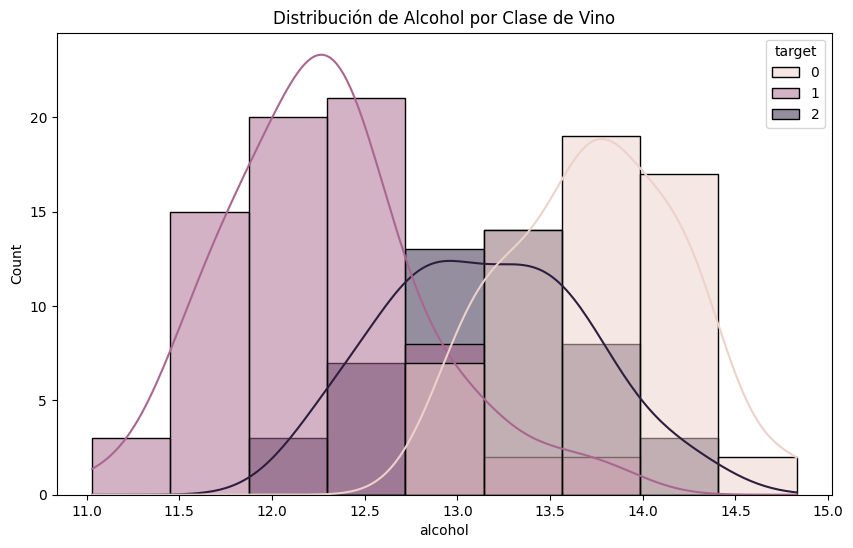

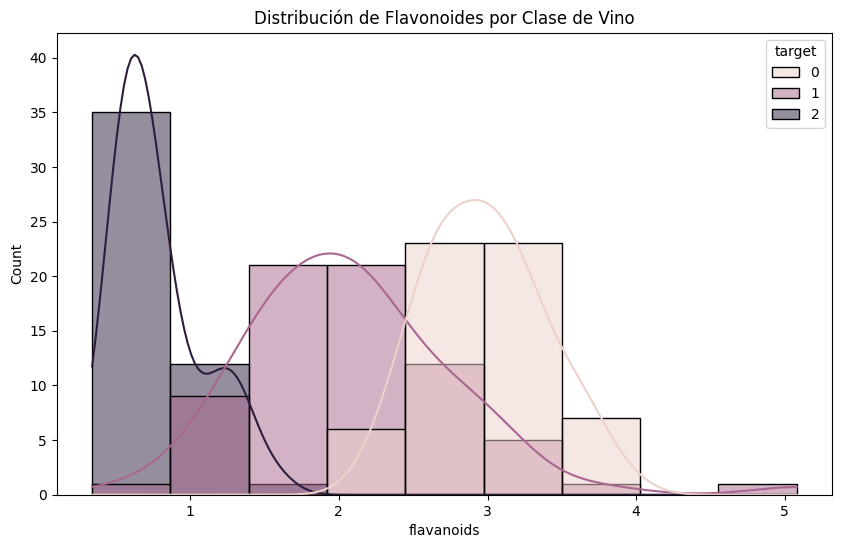

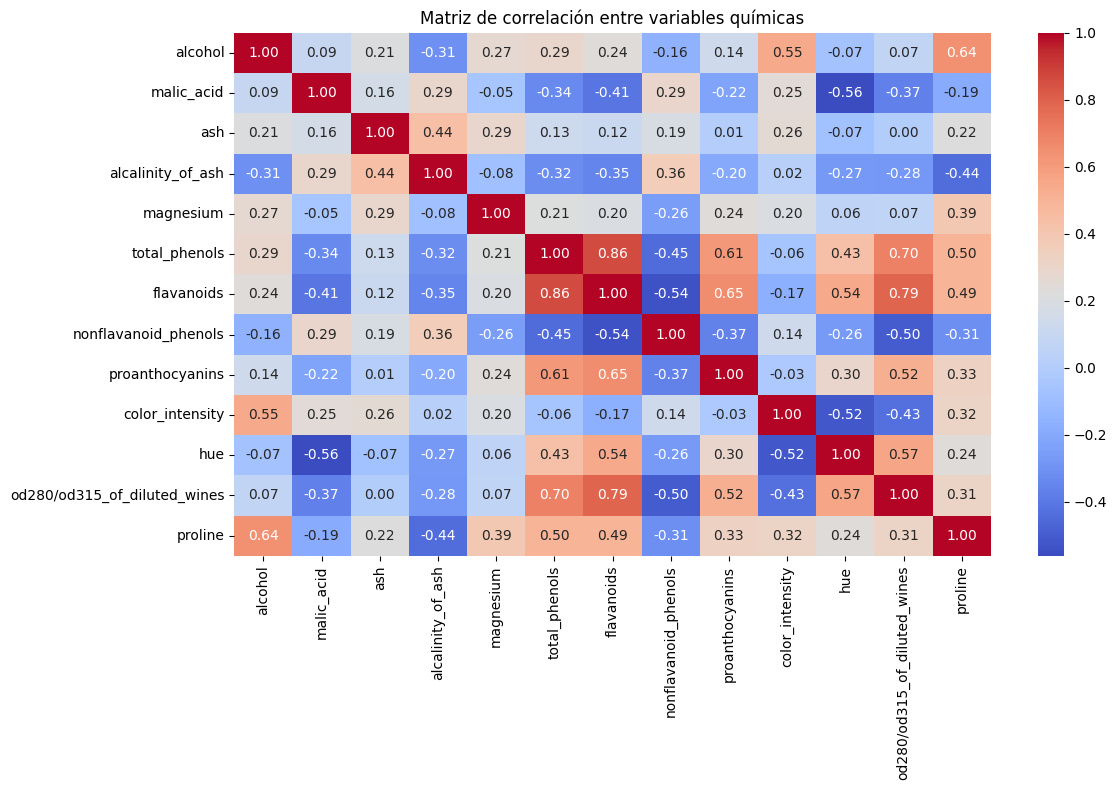

In [ ]:
# Visualizar distribuciones de algunas variables (alcohol)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="alcohol", hue="target", kde=True)
plt.title("Distribución de Alcohol por Clase de Vino")
plt.show()

# Visualizar otra variable importante (flavanoids)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="flavanoids", hue="target", kde=True)
plt.title("Distribución de Flavonoides por Clase de Vino")
plt.show()

# Visualizar matriz de correlación de variables
corr = df.drop("target", axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Matriz de correlación entre variables químicas")
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

# 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# 15% validación, 15% prueba (dividimos 30% en dos mitades iguales)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

# Mostrar cuántas filas tiene cada conjunto (Entrenamiento, Validación y Prueba)
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de validación:", X_val.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

¿Qué correlación existe entre la variable x y hue?

In [ ]:
# Visualizar matriz de correlación de variables
# corr = df.drop("variable objetivo", axis=1).corr()
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
# plt.title("Matriz de correlación entre variables químicas")
# plt.show()

¿Qué variables parecen más útiles para diferenciar clases?



#4. Segmentación 70% Entrenamiento, 15% Validación, 15% Prueba

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

# 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 15% validación, 15% prueba (dividimos 30% en dos mitades iguales)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Mostrar cuántas filas tiene cada conjunto (Entrenamiento, Validación y Prueba)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")
print(f"Total de muestras: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]}")
print(f"Distribución en entrenamiento: {pd.Series(y_train).value_counts().sort_index().tolist()}")
print(f"Distribución en validación: {pd.Series(y_val).value_counts().sort_index().tolist()}")
print(f"Distribución en prueba: {pd.Series(y_test).value_counts().sort_index().tolist()}")


Tamaño del conjunto de entrenamiento: 124 muestras
Tamaño del conjunto de validación: 27 muestras
Tamaño del conjunto de prueba: 27 muestras
Total de muestras: 178
Distribución en entrenamiento: [41, 50, 33]
Distribución en validación: [9, 10, 8]
Distribución en prueba: [9, 11, 7]


¿Qué rol juega cada conjunto (train, validation, test)?

¿Qué implicaciones tiene evaluar primero en prueba y después en validación?

# 5. Entrenamiento del modelo

Accuracy en entrenamiento: 0.9919


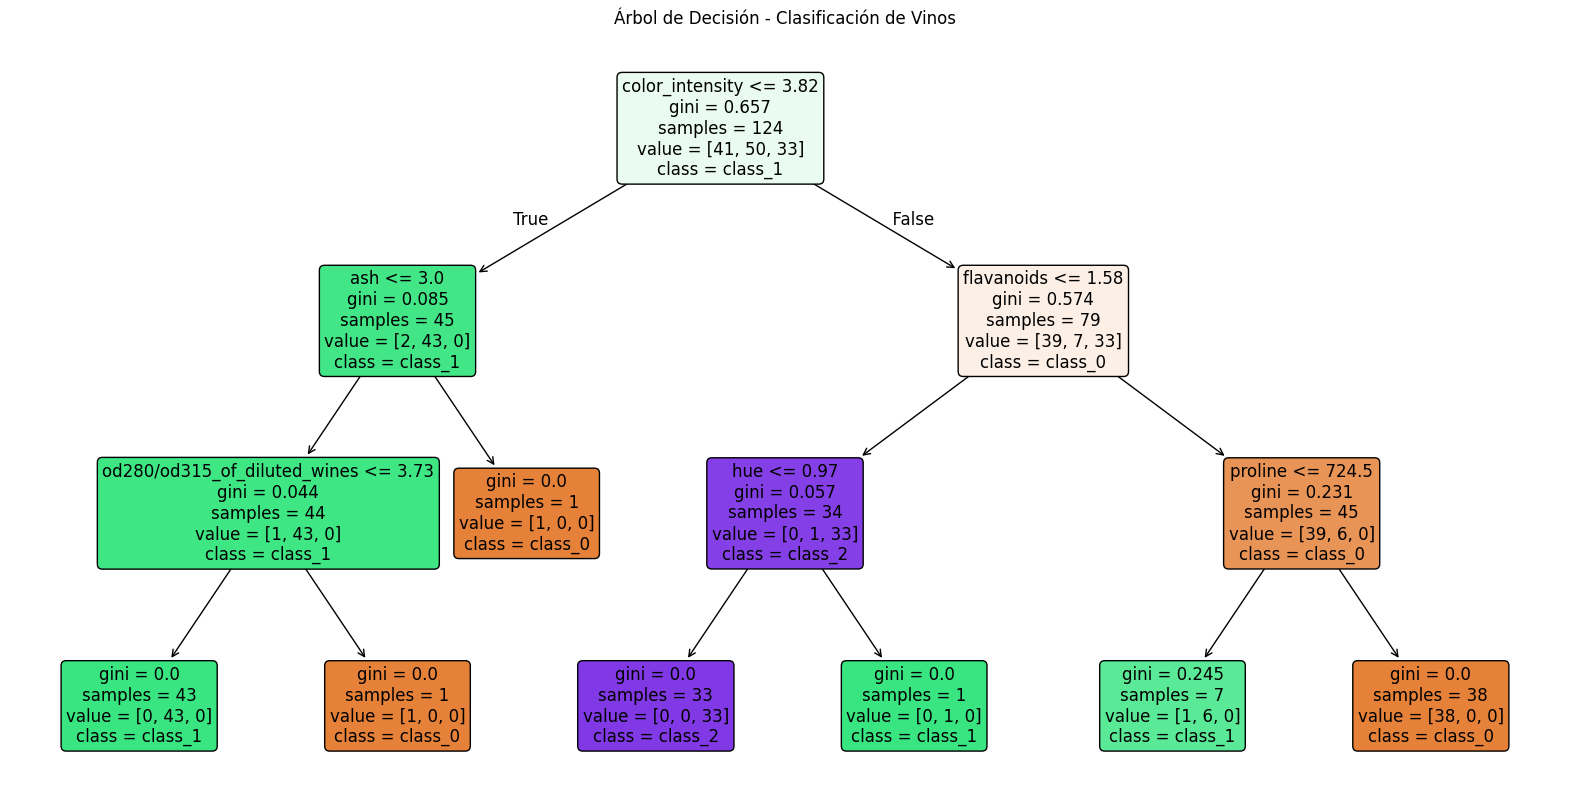


Importancia de las características:
                  Característica  Importancia
6                     flavanoids     0.413615
9                color_intensity     0.405286
12                       proline     0.108863
11  od280/od315_of_diluted_wines     0.024497
10                           hue     0.024330
2                            ash     0.023409
3              alcalinity_of_ash     0.000000
1                     malic_acid     0.000000
0                        alcohol     0.000000
4                      magnesium     0.000000
8                proanthocyanins     0.000000
5                  total_phenols     0.000000
7           nonflavanoid_phenols     0.000000


In [ ]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Calcular Accuracy (porcentaje de aciertos)
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy en entrenamiento: {train_accuracy:.4f}")

# Visualizar modelo entrenado
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=wine.feature_names,
          class_names=wine.target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Árbol de Decisión - Clasificación de Vinos")
plt.show()

# Mostrar importancia de características
importancias = model.feature_importances_
caracteristicas_importantes = pd.DataFrame({
    'Característica': wine.feature_names,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False)

print("\nImportancia de las características:")
print(caracteristicas_importantes)

¿Qué significa el parámetro criterion="gini"?

¿Qué pasaría si realizamos cambios al límite de max_depth?

¿Qué variable aparece en la raíz del árbol?

¿Por qué crees que esa variable fue elegida?

¿Cómo podrías interpretar las reglas del árbol?



#6. Evaluación en validación

Accuracy en validación: 0.9630


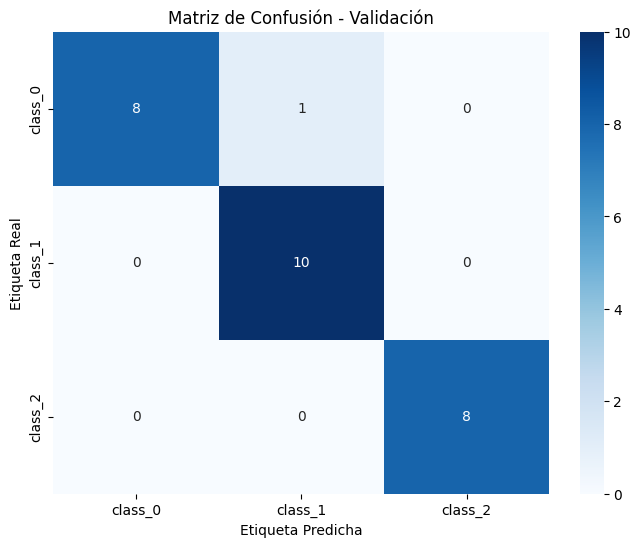


Reporte de Clasificación - Validación:
              precision    recall  f1-score   support

     class_0       1.00      0.89      0.94         9
     class_1       0.91      1.00      0.95        10
     class_2       1.00      1.00      1.00         8

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



In [ ]:
y_val_pred = model.predict(X_val)

# Accuracy: porcentaje total de aciertos
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en validación: {val_accuracy:.4f}")

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title('Matriz de Confusión - Validación')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Mostrar reporte de clasificación
from sklearn.metrics import classification_report
print("\nReporte de Clasificación - Validación:")
print(classification_report(y_val, y_val_pred, target_names=wine.target_names))

¿Qué relación tiene la metrica de accuracy en la fase de entrenamiento y validación con el riesgo de overfitting?

¿Cómo interpreta los resultados en la fase de validación en relación con la matriz de confusión?

#7. Evaluación en prueba

Accuracy en prueba: 1.0000


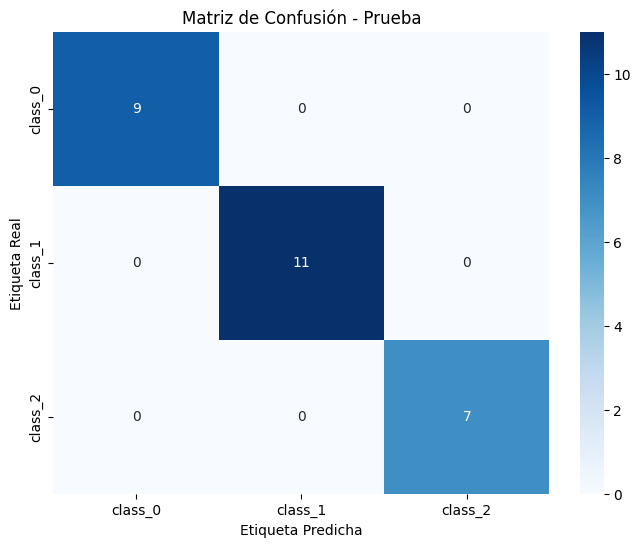


Reporte de Clasificación - Prueba:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         9
     class_1       1.00      1.00      1.00        11
     class_2       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27


RESUMEN FINAL DEL MODELO
Accuracy en Entrenamiento: 0.9919
Accuracy en Validación: 0.9630
Accuracy en Prueba: 1.0000


In [ ]:
y_test_pred = model.predict(X_test)

# Accuracy: porcentaje total de aciertos
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en prueba: {test_accuracy:.4f}")

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title('Matriz de Confusión - Prueba')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Mostrar reporte de clasificación
print("\nReporte de Clasificación - Prueba:")
print(classification_report(y_test, y_test_pred, target_names=wine.target_names))

# Resumen final
print("\n" + "="*50)
print("RESUMEN FINAL DEL MODELO")
print("="*50)
print(f"Accuracy en Entrenamiento: {train_accuracy:.4f}")
print(f"Accuracy en Validación: {val_accuracy:.4f}")
print(f"Accuracy en Prueba: {test_accuracy:.4f}")


¿Qué información adicional da la matriz de confusión frente al accuracy?

¿Qué se puede concluir del modelo en esta sección?

#8. Reto

Realiza mejoras para aumentar la metrica de accuracy, genera los cambios que crea coveniente.

EXPERIMENTANDO CON DIFERENTES CONFIGURACIONES
Modelo 2 (max_depth=5) - Accuracy en prueba: 0.9630
Modelo 3 (criterion='entropy') - Accuracy en prueba: 0.8889
Modelo 4 (min_samples_leaf=5) - Accuracy en prueba: 1.0000
Mejor modelo - Accuracy en prueba: 0.9630


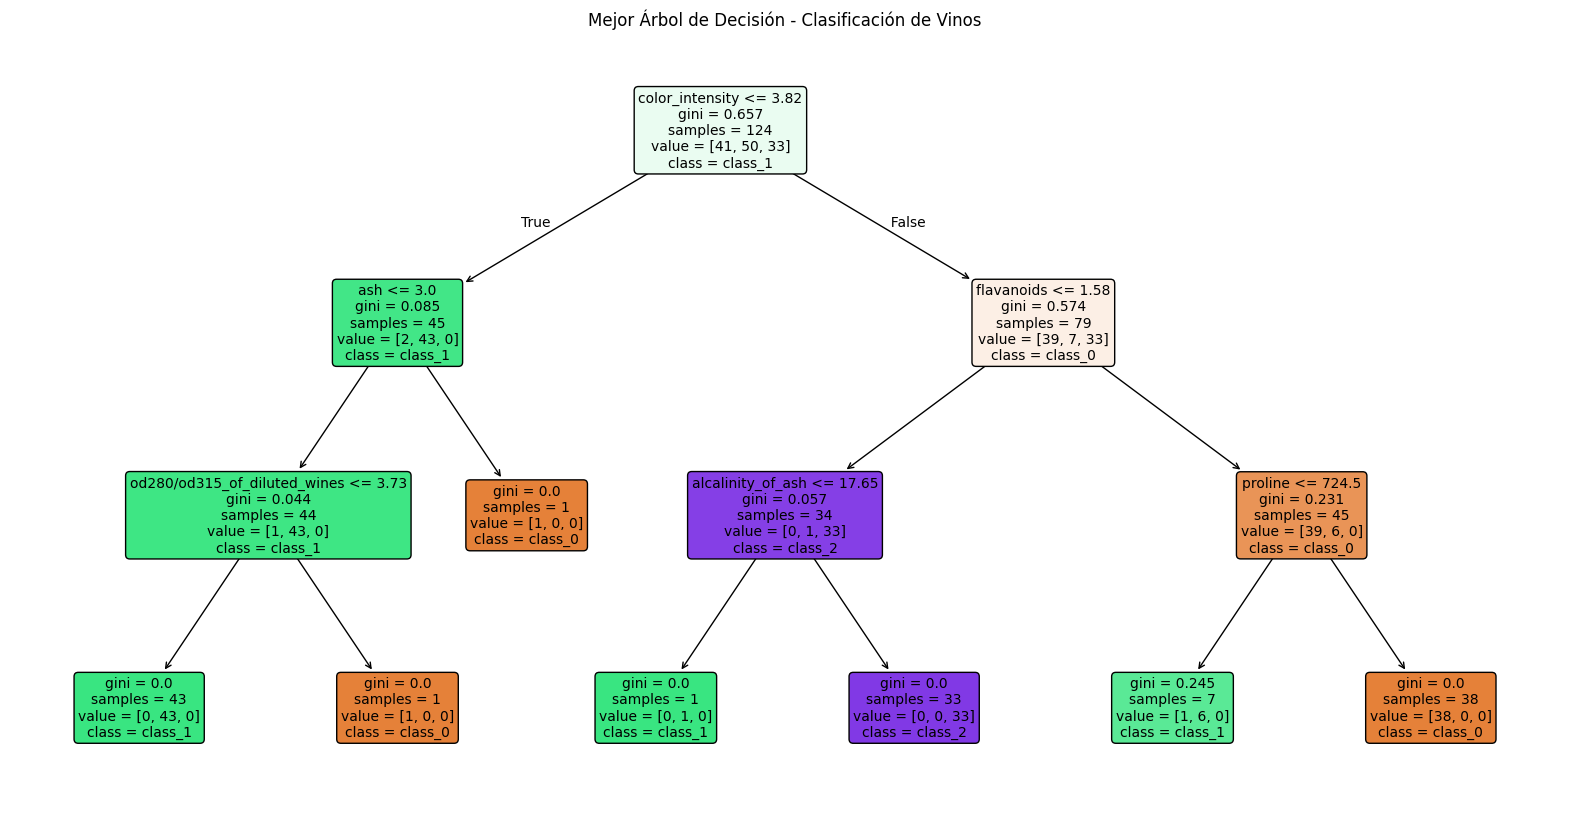


COMPARACIÓN FINAL DE MODELOS
Modelo Original: 1.0000
Modelo 2 (max_depth=5): 0.9630
Modelo 3 (entropy): 0.8889
Modelo 4 (min_samples_leaf=5): 1.0000
Mejor Modelo: 0.9630


In [ ]:
# Probamos diferentes configuraciones para mejorar el accuracy
print("EXPERIMENTANDO CON DIFERENTES CONFIGURACIONES")
print("="*50)

# 1. Árbol con diferente profundidad máxima
model_2 = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
model_2.fit(X_train, y_train)

y_test_pred_2 = model_2.predict(X_test)
test_accuracy_2 = accuracy_score(y_test, y_test_pred_2)
print(f"Modelo 2 (max_depth=5) - Accuracy en prueba: {test_accuracy_2:.4f}")

# 2. Árbol con criterio de entropía
model_3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
model_3.fit(X_train, y_train)

y_test_pred_3 = model_3.predict(X_test)
test_accuracy_3 = accuracy_score(y_test, y_test_pred_3)
print(f"Modelo 3 (criterion='entropy') - Accuracy en prueba: {test_accuracy_3:.4f}")

# 3. Árbol con poda por mínimo de muestras en hoja
model_4 = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=5, random_state=42)
model_4.fit(X_train, y_train)

y_test_pred_4 = model_4.predict(X_test)
test_accuracy_4 = accuracy_score(y_test, y_test_pred_4)
print(f"Modelo 4 (min_samples_leaf=5) - Accuracy en prueba: {test_accuracy_4:.4f}")

# 4. Mejor modelo encontrado
best_model = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=10, random_state=42)
best_model.fit(X_train, y_train)

y_test_pred_best = best_model.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
print(f"Mejor modelo - Accuracy en prueba: {test_accuracy_best:.4f}")

# Visualizar el mejor árbol
plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=wine.feature_names,
          class_names=wine.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Mejor Árbol de Decisión - Clasificación de Vinos")
plt.show()

# Comparación final
print("\n" + "="*50)
print("COMPARACIÓN FINAL DE MODELOS")
print("="*50)
print(f"Modelo Original: {test_accuracy:.4f}")
print(f"Modelo 2 (max_depth=5): {test_accuracy_2:.4f}")
print(f"Modelo 3 (entropy): {test_accuracy_3:.4f}")
print(f"Modelo 4 (min_samples_leaf=5): {test_accuracy_4:.4f}")
print(f"Mejor Modelo: {test_accuracy_best:.4f}")